In [2]:
#Importing libraries
import pandas as pd
from datetime import date, timedelta
import matplotlib.pyplot as plt
import numpy as np
import sdt.changepoint as c
import math

In [3]:
# create a dataframe from the csv file
dataframe = pd.read_csv('data.csv')

# filter data from 2021-07-16 to 2021-08-15
dataframe = dataframe[(dataframe['date'] >= '2021-07-16') & (dataframe['date'] <= '2021-08-15')]

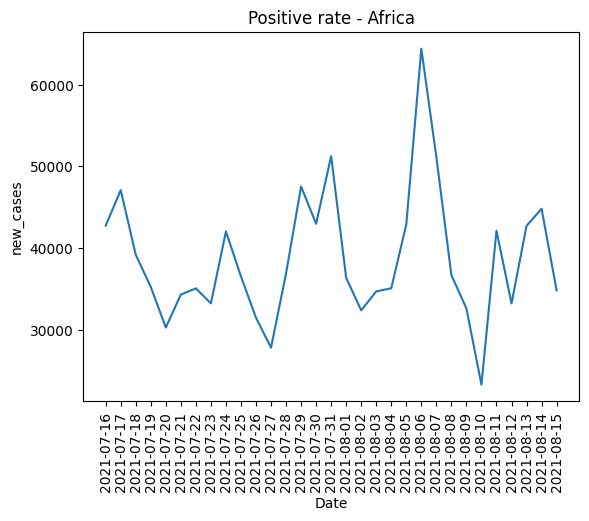

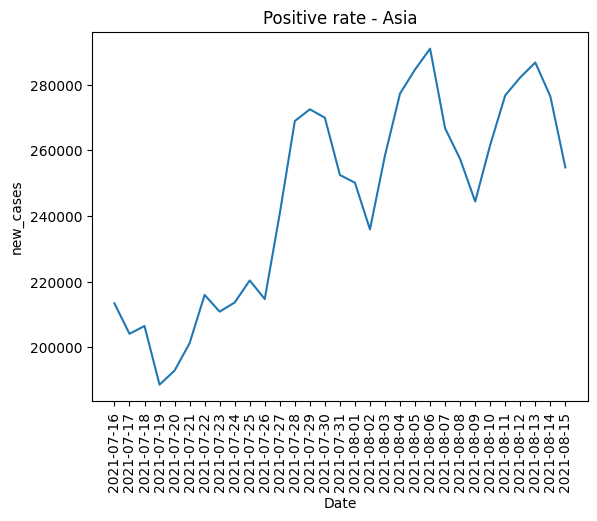

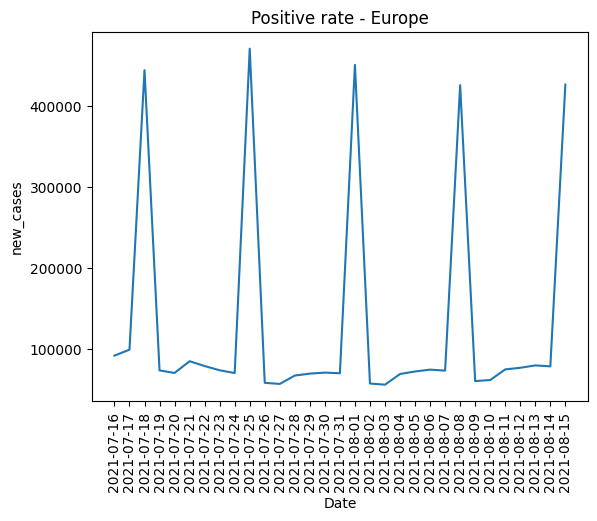

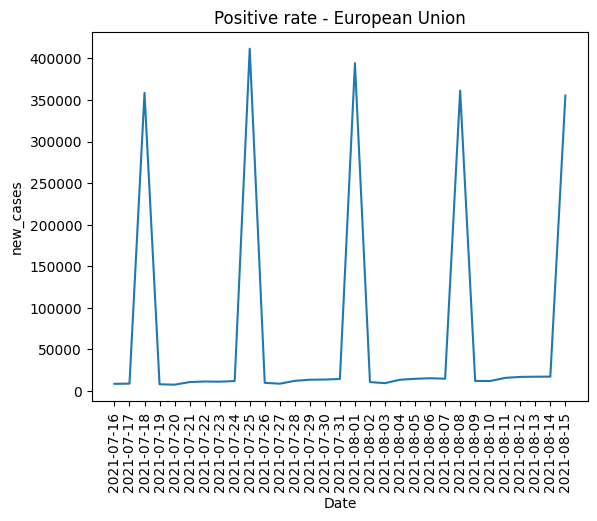

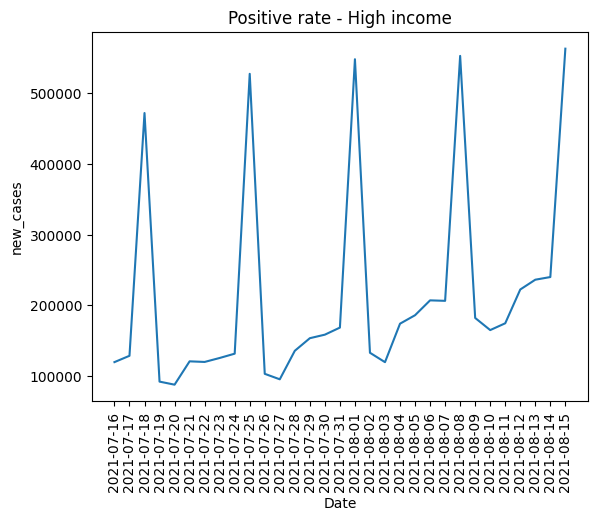

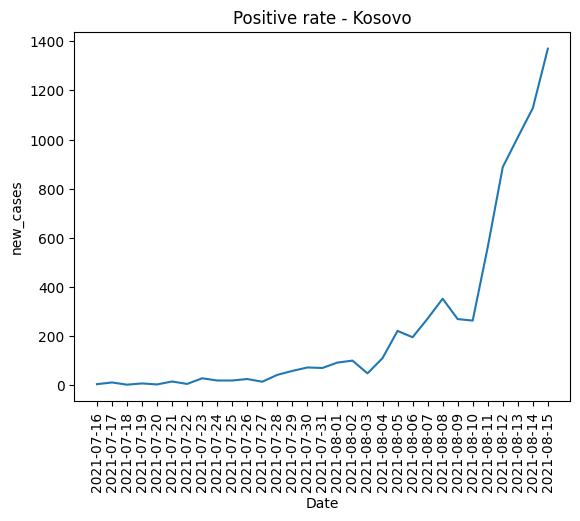

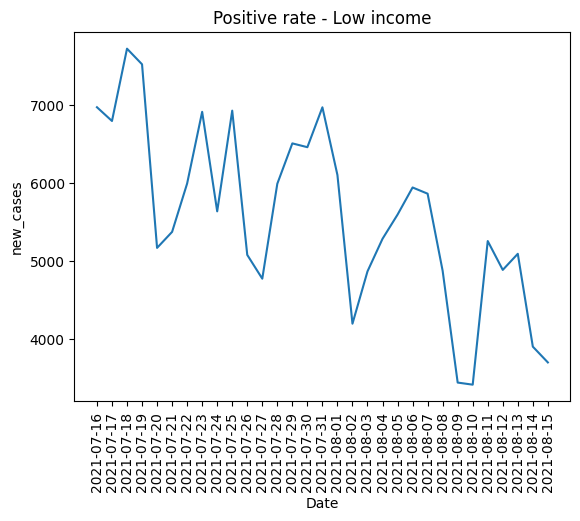

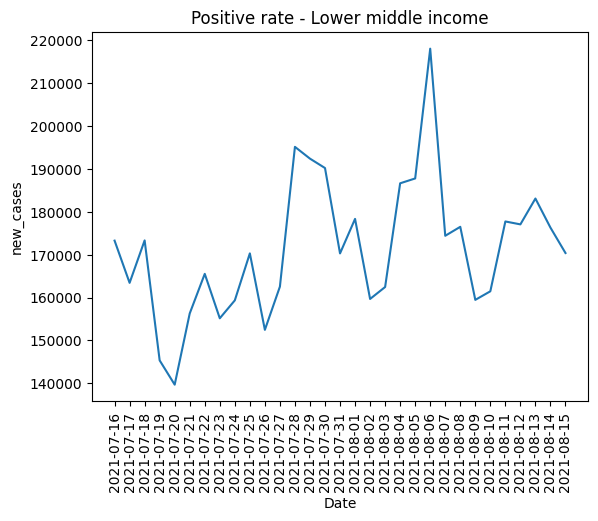

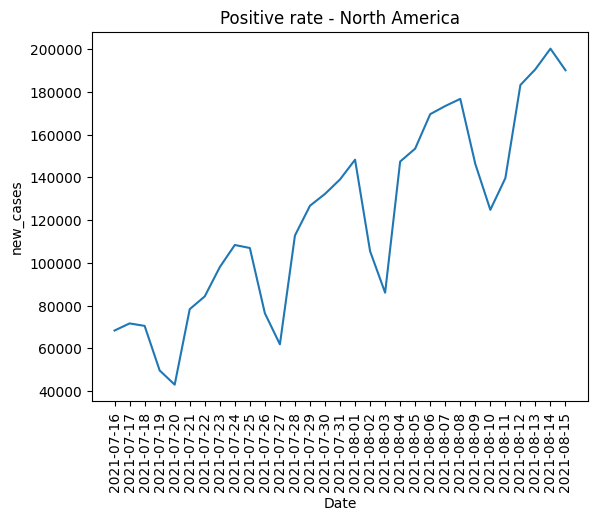

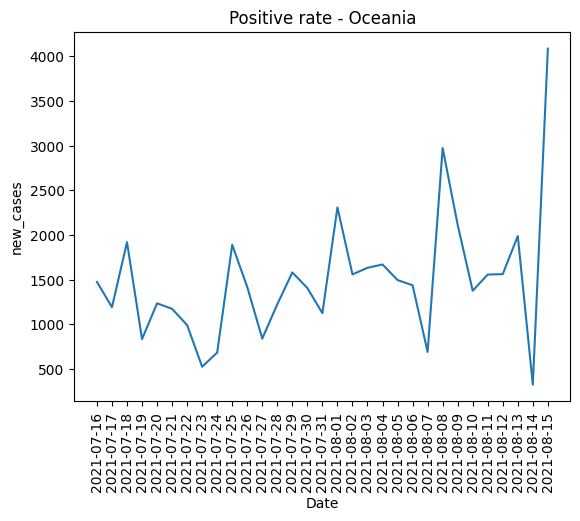

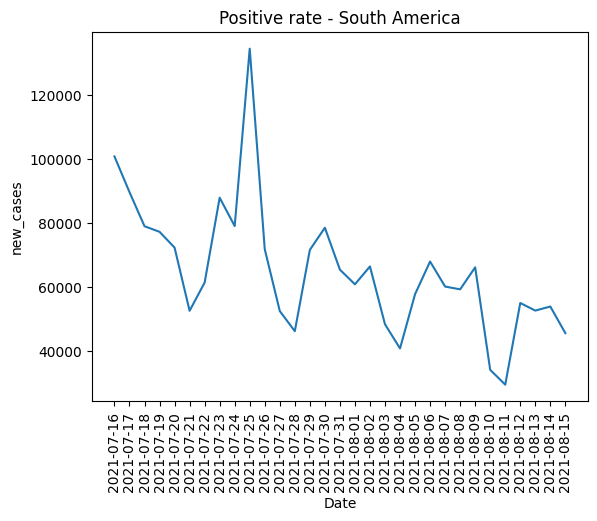

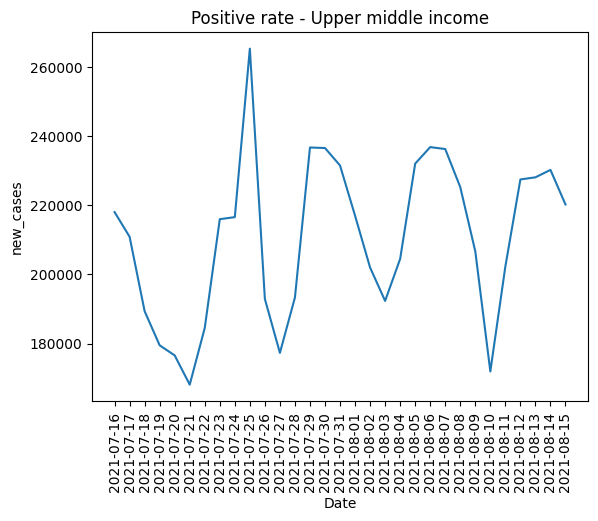

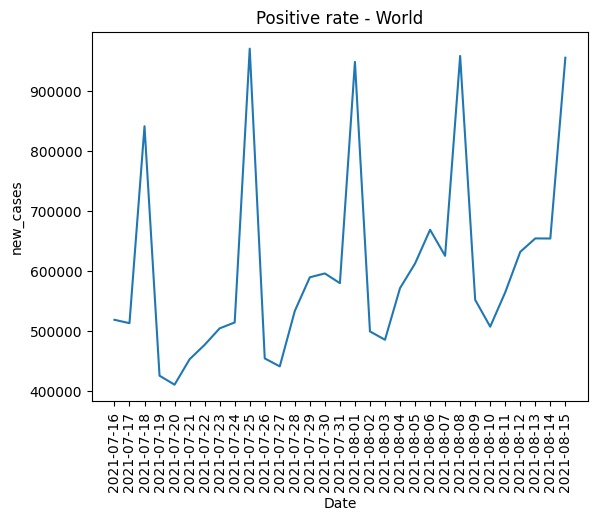

In [13]:
# partiziona il dataframe con soltanto gli iso_code che iniziano con "OWID_" e salvali in un nuovo dataframe
df_owid = dataframe[dataframe['iso_code'].str.startswith('OWID_')]
# per ogni iso_code all'interno del nuovo dataframe crea un plot con y positive_rate e x date
for iso_code in df_owid['iso_code'].unique():
    if df_owid[df_owid['iso_code'] == iso_code]['new_cases'].isnull().all():
        continue
    plt.plot(df_owid[df_owid['iso_code'] == iso_code]['date'], df_owid[df_owid['iso_code'] == iso_code]['new_cases'])
    plt.title("Positive rate - " + df_owid[df_owid['iso_code'] == iso_code]['location'].unique()[0])
    plt.ylabel("new_cases")
    plt.xlabel("Date")
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
#filter by iso_cod that not contain "OWID" prefix
dataframe = dataframe[~dataframe['iso_code'].str.contains("OWID")]

# aggragate by iso_code and date and sum total_cases, total_deaths, population, total_vaccinations, new_cases, mind positive_rate, max positive_rate,KEEP LOCATION 
dataframe = dataframe.groupby(['iso_code', 'date']).agg({'total_cases': 'sum', 'total_deaths': 'sum', 'total_vaccinations': 'sum', 'new_cases': 'sum', 'positive_rate': 'max','population': 'sum', 'location': 'max'})

iso_codes_europe = [ "ITA", "FRA", "DEU", "ESP", "GBR", "CHE", "NLD", "BEL", "AUT", "SWE", "NOR", "FIN", "GRC", "PRT", "DNK", "POL", "CZE", "HUN", "ROU", "BGR", "HRV", "SVK", "SVN", "IRL", "LUX", "EST", "LVA", "LTU", "MLT", "CYP", "ISL", "LIE", "AND", "MCO", "SMR", "VAT"]
# rimuovo da iso_cedes_europe tutti i codici che non sono presenti nel dataframe
iso_codes_europe = [iso_code for iso_code in iso_codes_europe if iso_code in dataframe.index.get_level_values('iso_code').unique()]

# per ogni iso_code stampa il plot di positive_rate
for iso_code in iso_codes_europe:
    plt.plot(dataframe.loc[iso_code]['total_cases'])
    plt.title("Positive rate - " + dataframe.loc[iso_code]['location'].unique()[0])
    plt.ylabel("total_cases")
    plt.xlabel("Date")
    plt.xticks(rotation=90)
    plt.show()
